## DATA 602 - Spring 2024
### Homework Assignment 1
Total points : 60<br>
 Please provide your solutions into the cells provided after question cells. You can create new cells as needed. <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

The data from the <code>Fish.csv</code> looks like this

In [2]:
data = pd.read_csv('Fish.csv')
df = data.copy()
#Removing outliers
df = df.drop([142,143,144])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


The meaning of columns are as follows :
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

Our <b>dependent</b> variable is 'Weight'. <b>Independent</b> variables are 'length1', 'length2', 'height' and 'width' (ignore 'species').

<b>Question 1</b> [<span style="color: red;">2 x 6 = 10 points</span>]:<br>
1. Drop the column for Species. Then from the remaining Choose two independent variables (i.e choose two features) for predicting the weight (target) of the fish .
2. Justify your choice (in a comment) and show your work (Hint : correlation matrix)
3. Create a <code>X</code> and <code>y</code> from the Independent (excluding species) and dependent variables respectively. Do a train-test split of 80%-20% and create <code>X_train,y_train</code> and <code>X_test,y_test</code>. Print out all their shapes.
4. Use linear regression from scikit learn to train (fit) on <code>X_train,y_train</code>
5. Show the intercept and coefficients from the fitted model
6. Use <code>X_test</code> to predict <code>y_pred_test</code> and calculate the RMSE and R2 squares.

In [3]:
#Your code goes below
df.drop('Species', axis=1, inplace=True)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#calcualting all correlation values with respective to each other
df_cor = df.corr()
df_cor

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


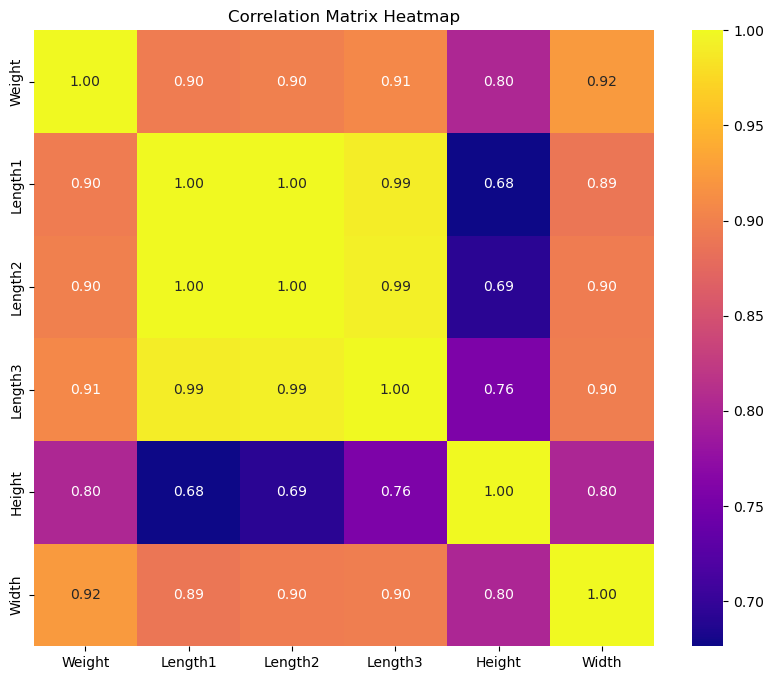

In [5]:
#Heat Map for COrrelation matrix for above table
plt.figure(figsize=(10, 8))
sns.heatmap(df_cor, annot=True, cmap='plasma', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


From the above graph,I am choosing "Width" and "Lenght3" as two independent variables(Columns) for Predicting Dependent column "Weight" Since Width has highest correlation(0.92) and Length3 has 2nd highest corelation(0.91) when compared to other variables.

In [6]:
# Dropping all columns other than Length3 and weight
# creating X values for prediction 
X = df.drop(columns = ["Height",'Length1','Length2','Weight'])
X.head()

,Length3,Width
0,30.0,4.0200
1,31.2,4.3056
2,31.1,4.6961
3,33.5,4.4555
4,34.0,5.1340


In [7]:
# creating y for prediction
y = df["Weight"]
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [8]:
# Split the data into training and testing sets using train_test_split Module from sklearn libary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


In [9]:
#creating lr as linaer regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
# Fitting training dataset into model
lr.fit(X_train,y_train)


LinearRegression()

In [11]:
#shape for training dataset
print(X_train.shape)
print(y_train.shape)

(124, 2)
(124,)


In [12]:
c = lr.intercept_
m = lr.coef_
print("Coeffients m1,m2 are : ",m)
print("Interception c  : ",c)


Coeffients m1,m2 are :  [ 11.99557145 109.39495449]
Interception c  :  -467.21008691909947


In [13]:
#lets predict y_train values from lr model using X-train values
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 104.82273371,  488.06894126,   26.99750431,  321.99860518,
        320.3955544 ,  819.16070532, 1013.03834645,  787.48454323,
        -67.3068309 ,  107.18820013,  171.47790887,  658.48903386,
        321.99860518,  223.34751867,  686.10448305,  -72.17279354,
       -175.4714911 ,  253.62887146,  690.46682208,  343.83972254,
        191.58933399,  192.89071138,  114.5083971 ,  302.79138657,
        177.4647551 ,  374.98783087,  378.98116927,  433.83893585,
        172.93707168,  502.27303884,  566.38051627,  849.14672322,
        378.06265847,  889.91609418,  751.50416738,  557.43078854,
       -223.0557609 ,  184.16772359,  630.01895758,  544.68460182,
         -5.32533995,  240.17540489,  239.79294511,  196.41742309,
        161.70641978,  254.19941549,  735.07044682,  217.13094303,
        248.38002647,  821.50721922,  726.93321547, -164.29301702,
        598.97817862,  422.05077649,  203.89626637,  685.59832404,
        643.33944419,  447.26587519,  590.51097764, -178.74576

In [14]:
# Model evaluation
# model evaluation for training set
y_pred_train = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2 = r2_score(y_train, y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 108.18350732585613
R2 score is 0.8886886042274107




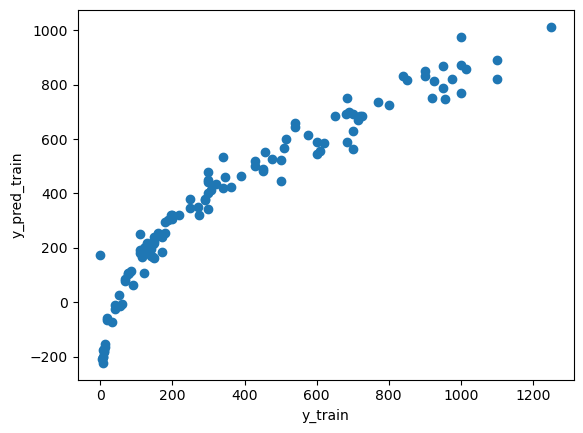

In [15]:
import matplotlib.pyplot as pt 
plt.scatter(y_train,y_pred_train)
plt.xlabel("y_train")
plt.ylabel("y_pred_train")
plt.show()

In [16]:

# Calculate the root mean squared error (RMSE)
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 108.6241910065677
R2 score is 0.8642393556998063


<b>Question 2</b> [<span style="color: red;">10 points</span>]:<br>
For the previous `X_train,y_train`, without using `scikit-learn`, use the Linear Regression training formula: $\beta = (X^TX)^{-1}X^Ty$ to calculate the intercept $(\beta_0)$ and the coefficients $(\beta_1,\beta_2)$ and print them out. <b>Hint:</b> Remember to add the column of all 1s for the intercept!

In [17]:
#Your code goes below

# Add a column of all 1s for the intercept
X_train_with_intercept = np.column_stack((np.ones(len(X_train)), X_train))

# Calculate beta coefficients using the formula: beta = (X^T * X)^-1 * X^T * y
beta = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)

# Extract intercept and coefficients
intercept = beta[0]
coefficients = beta[1:]

# Print out intercept and coefficients
print("Intercept (beta0):", intercept)
print("Coefficients (beta1, beta2):", coefficients)


Intercept (beta0): -467.2100869191037
Coefficients (beta1, beta2): [ 11.99557145 109.39495449]


<b>Question 3</b>[<span style="color: red;">10 points</span>]: <br>
Now use `X_train,y_train`, without using `scikit-learn`, use batch gradient descent (BGD) for iterating to the correct answer (approximation) and print it out (intercept and coefficients). The answer in this case should look similar (but may not be exactly the same) to the answer from the first two questions.  Other points:<br>
- Use $\|\beta^{(k-1)} - \beta^{(k)}\|_2 < 10^{-5}$ as the termination criteria for the loop (see `numpy.linalg.norm` for norm operations). 
- Your initial guess, $\beta^{(0)}$ should be all zeros .
- Choose an $\eta$ that helps you solve the problem (choice left up to you)<br>
****
<b>Notes:</b>
If the cost function of linear regression can be framed as the L2 norm of linear least squares:
$$ F(\beta) =  || X\beta -y||_2^{2}  = \beta^T X^T X \beta - 2y^TX\beta +y^T y $$
Then the gradient to this cost function can be written as
$$ \nabla F(\beta) = 2X^T(X\beta - y) $$
And the kth iteration of (batch) gradient descent can be written as
$$ \beta^{(k)} = \beta^{(k-1)} - \frac{\eta}{m} \nabla F(\beta^{(k-1)}) $$
(the superscript in parenthesis represents the iteration and NOT an exponent)<br>
where $\eta$ is the learning rate and $m$ are the number of rows in $X$


In [18]:
#Your code goes below

# Initialize coefficients to zeros
beta = np.zeros(X_train.shape[1] + 1)  # +1 for the intercept

# Define learning rate and convergence criterion
learning_rate = 0.001
convergence_criterion = 1e-5

# Add a column of all 1s to X_train for the intercept
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Define the cost function
def cost_function(X, y, beta):
    y_pred = np.dot(X, beta)
    error = y_pred - y
    cost = np.sum(error ** 2) / (2 * len(y))
    return cost

# Perform batch gradient descent
while True:
    # Calculate predicted y values
    y_pred = np.dot(X_train_with_intercept, beta)
    
    # Calculate the gradient of the cost function
    gradient = np.dot(X_train_with_intercept.T, (y_pred - y_train)) / len(y_train)
    
    # Update coefficients
    new_beta = beta - learning_rate * gradient
    
    # Check convergence criterion
    if np.linalg.norm(new_beta - beta) < convergence_criterion:
        break
    
    beta = new_beta

# Extract intercept and coefficients
intercept = beta[0]
coefficients = beta[1:]

# Print out the intercept and coefficients
print("Intercept (β0):", intercept)
print("Coefficients (β1, β2):", coefficients)


Intercept (β0): -467.1213935732904
Coefficients (β1, β2): [ 11.99336257 109.39228942]


<b>Question 4</b>[<span style="color: red;">10 points</span>]: Now, once again, without `sklearn`, compute $\beta$ using stochastic gradient descent instead of batch gradient descent (BGD), using `X_train,y_train`, and without `sklearn`. Print out the inercept and coefficients. Other details:<br> 
- No particular stopping criteria (meaning, you can even loop it for a fixed number of iterations), but the values for the intercept and coefficients should be similar to values from Questions (each value can be up to + or - five from the actual value)
- Your initial guess, $\beta^{(0)}$ should be all zeros .
- Choose an $\eta$ that helps you solve the problem (choice left up to you)<br>

In [19]:

def stochastic_gradient_descent(X_train, y_train, learning_rate, epochs):
    # Add a column of ones to represent the intercept term
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    
    num_samples, num_features = X_train.shape
    # Initialize coefficients with random values
    beta = np.random.rand(num_features)
    
    # Convert y_train to a NumPy array
    y_train = np.array(y_train)
    
    # Perform stochastic gradient descent
    for _ in range(epochs):
        for i in range(num_samples):
            prediction = np.dot(X_train[i], beta)
            error = y_train[i] - prediction
            gradient = -2 * X_train[i] * error
            beta -= learning_rate * gradient
    
    return beta

# Assuming X_train and y_train are your training data
# Assuming X_train is a matrix of shape (num_samples, num_features)
# Assuming y_train is a vector of shape (num_samples,)
# Adjust the learning rate and epochs as needed
beta = stochastic_gradient_descent(X_train, y_train, learning_rate=0.0001, epochs=10000)

intercept = beta[0]
coefficients = beta[1:]

print("Coefficients:")
print("Intercept:", intercept)
print("Length:", coefficients[0])
print("Width:", coefficients[1])


Coefficients:
Intercept: -475.32461881810644
Length: 11.83766981202667
Width: 112.43302326193532


<b>Question 5</b>[<span style="color: red;">10 points</span>]: Now for polynomial degrees 1 to 11 (included), train different models on `X_train,y_train` and calculate the R2 values for `X_train,y_train` as well as `X_test,y_test` and draw a plot similar to the one in `Poly_reg_exercise_soln.ipynb`. Comment on which degree polynomial may best suit this dataset for prediction and why. (And yes, you can use `sklearn`)

In [20]:
#lets set degree for some value, assume as 2
degree = 2

# Create a pipeline for polynomial regression with degree 'degree' using linear regression
poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [21]:
# Model evaluation
# model evaluation for training set
y_train_predict = poly_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 49.91735477240337
R2 score is 0.9763015118886748




In [22]:
# model evaluation for testing set
y_test_predict = poly_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 59.380158969537746
R2 score is 0.9594301415649233


In [23]:
# Initialize empty lists to store R^2 scores for training and testing data for different degrees of polynomial features
r2_train_list = []
r2_test_list = []

# Iterate over different degrees of polynomial features
for degree in range(1, 12):
    # Create a pipeline for polynomial regression with the current degree and linear regression as the estimator
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Fit the polynomial regression model to the training data
    poly_model.fit(X_train, y_train)

    # Predict the target variable on the training data using the trained model
    y_train_predict = poly_model.predict(X_train)
    
    # Calculate and append the R^2 score for the training data
    r2_train_list.append(r2_score(y_train, y_train_predict))
    
    # Predict the target variable on the testing data using the trained model
    y_test_predict = poly_model.predict(X_test)
    
    # Calculate and append the R^2 score for the testing data
    r2_test_list.append(r2_score(y_test, y_test_predict))

    

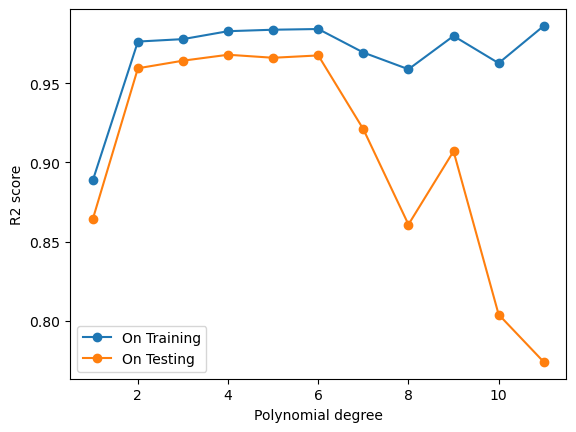

In [24]:
plt.plot([i for i in range(1,12)],r2_train_list,label="On Training",marker="o")
plt.plot([i for i in range(1,12)],r2_test_list,label="On Testing",marker="o")
plt.xlabel("Polynomial degree")
plt.ylabel("R2 score")
plt.legend()

From the above graph, it is observed that the polynomial degree 4 appears to offer the best fit,as evidenced by the trend in R2 scores. Initially, elevating the polynomial degree results in improved R-squared scores for both the training and testing datasets, indicative of enhanced model performance. However, beyond a certain threshold, the continued increase in polynomial degree leads to overfitting, as reflected in a decline in the testing R-squared score. Consequently, a polynomial degree of 4 emerges as the optimal choice, striking a balance between capturing underlying patterns and preventing overfitting in the dataset.